In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df['Product_Category']

0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category, Length: 550068, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Question we will try to answer with this database. given some input features we will determine what are the possible product that customer is likely to buy?
second , given the customer details what is the purchase amount he will issue?
Current work which is established in the community and the paper we mentioned focuses on the second question   

<Axes: >

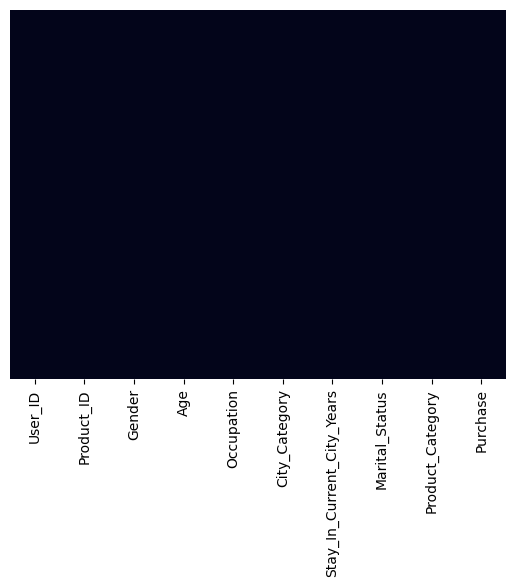

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Result : Dataset doesn't contain null values

In [6]:
# Removing Unnecessary Features
df = df.drop(['Product_ID'], axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category            550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 37.8+ MB


Distribution of data

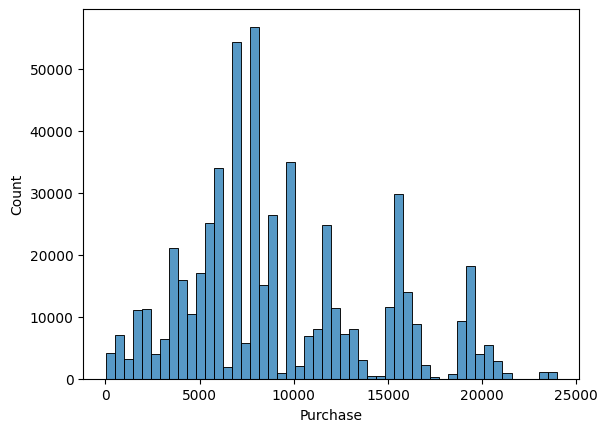

In [8]:
sns.histplot(df['Purchase'], bins=50)
plt.show()

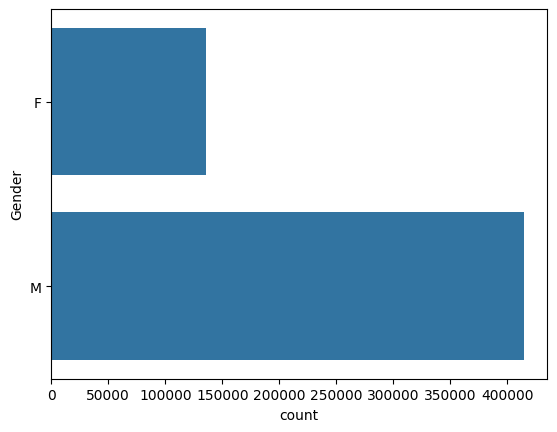

In [9]:
sns.countplot(df['Gender'])
plt.show()

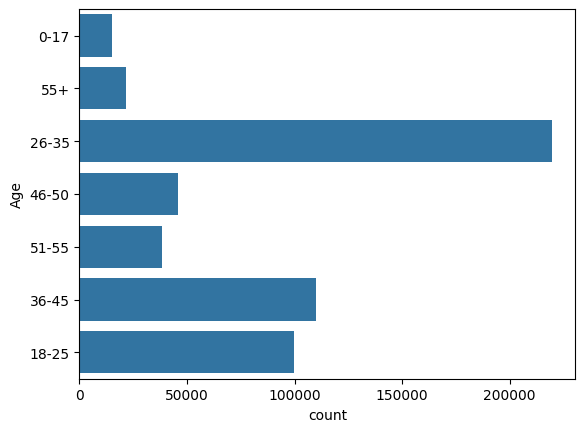

In [10]:
sns.countplot(df['Age'] )
plt.show()

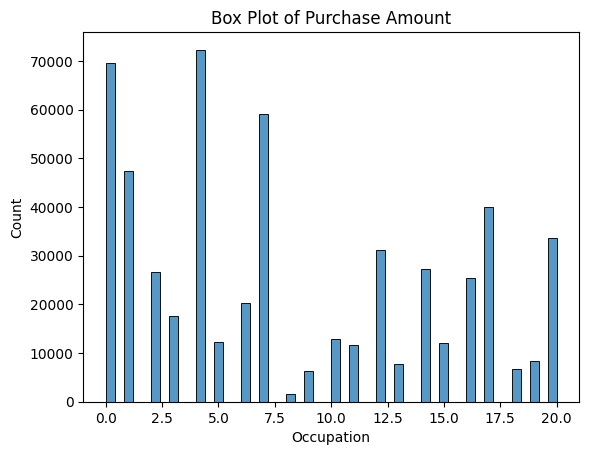

In [11]:
sns.histplot(df['Occupation'], bins=50)
plt.title('Box Plot of Purchase Amount')
plt.show()  


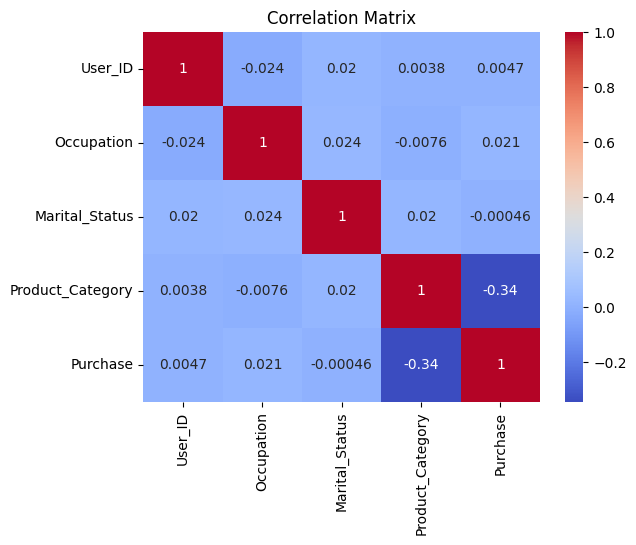

In [12]:
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

features are not corelated so we can't remove any of the available features

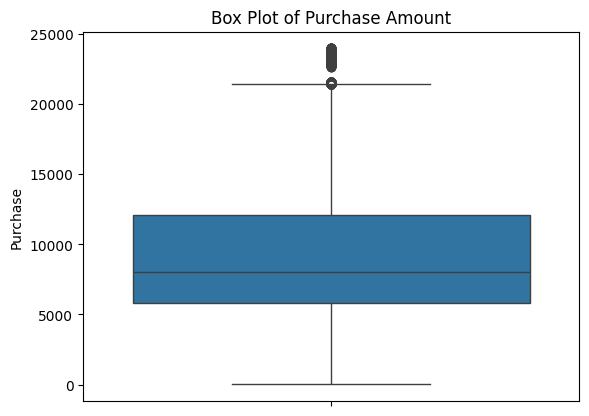

In [13]:
sns.boxplot(df['Purchase'])
plt.title('Box Plot of Purchase Amount')
plt.show()  


Purchase column has almost bell shaped curve so we can assume it is showing normality behaviour.But it has some outlier as we can see from the above graph


Since the outliers is present in the given data we need to study whether the outlier is capturing a certain set of customer segment or just an human error or unusual customer behaviour

In [14]:
lower_boundary = df['Purchase'].quantile(0.01)
upper_boundary = df['Purchase'].quantile(0.99)
data_interruption_lower = df[(df['Purchase'] < lower_boundary)]
data_interruption_upper = df[(df['Purchase'] > upper_boundary)]
data_interruption = pd.concat([data_interruption_lower, data_interruption_upper])


In [15]:
data_interruption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10972 entries, 122 to 545864
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     10972 non-null  int64 
 1   Gender                      10972 non-null  object
 2   Age                         10972 non-null  object
 3   Occupation                  10972 non-null  int64 
 4   City_Category               10972 non-null  object
 5   Stay_In_Current_City_Years  10972 non-null  object
 6   Marital_Status              10972 non-null  int64 
 7   Product_Category            10972 non-null  int64 
 8   Purchase                    10972 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 857.2+ KB


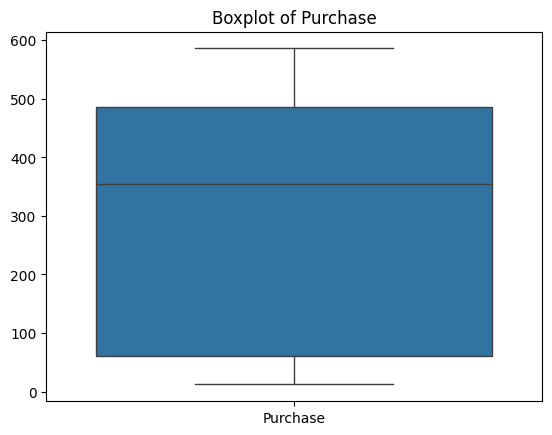

In [16]:
sns.boxplot(data=data_interruption_lower[['Purchase']])
plt.title('Boxplot of Purchase')
plt.show()

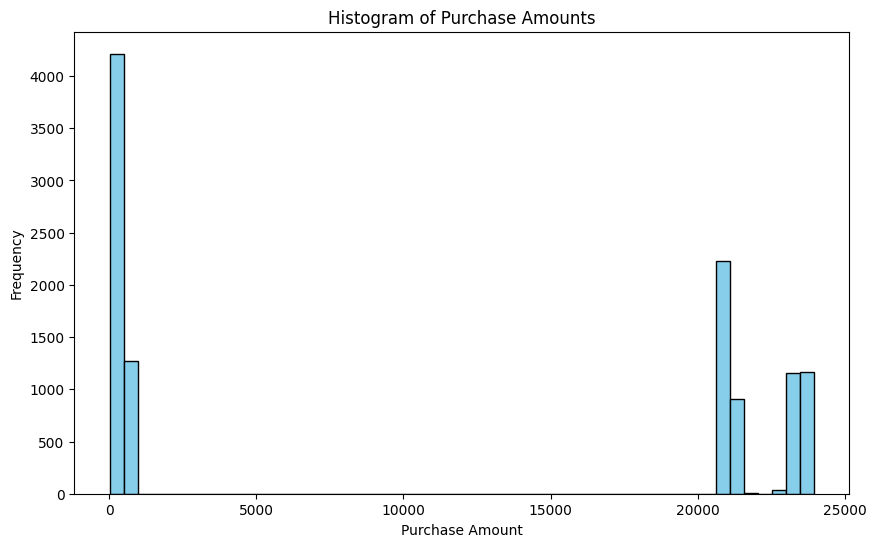

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(data_interruption['Purchase'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Purchase Amount')

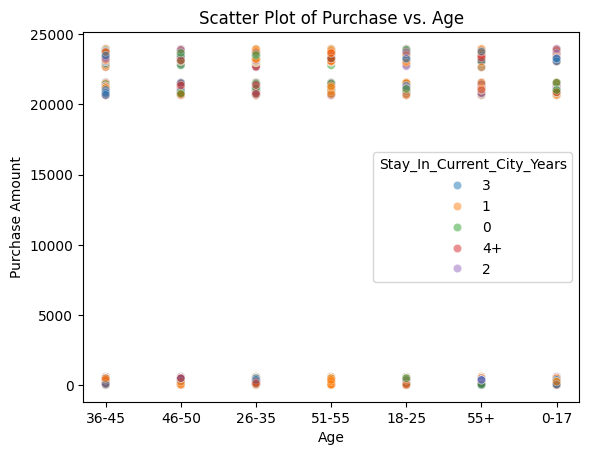

In [18]:
sns.scatterplot(x='Age', y='Purchase', data=data_interruption, hue='Stay_In_Current_City_Years', alpha=0.5)
plt.title('Scatter Plot of Purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')


Text(0, 0.5, 'Purchase Amount')

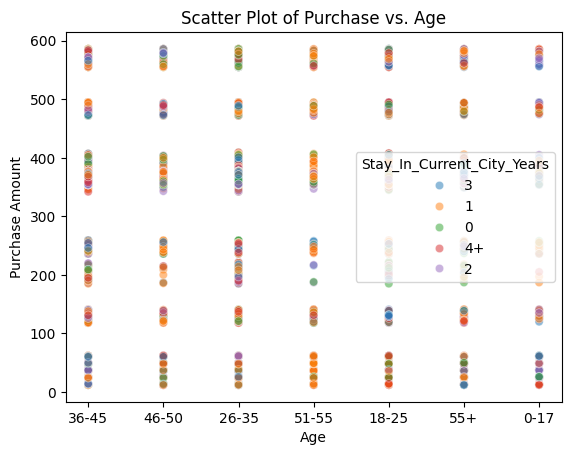

In [19]:
sns.scatterplot(x='Age', y='Purchase', data=data_interruption_lower, hue='Stay_In_Current_City_Years', alpha=0.5)
plt.title('Scatter Plot of Purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')


Text(0, 0.5, 'Purchase Amount')

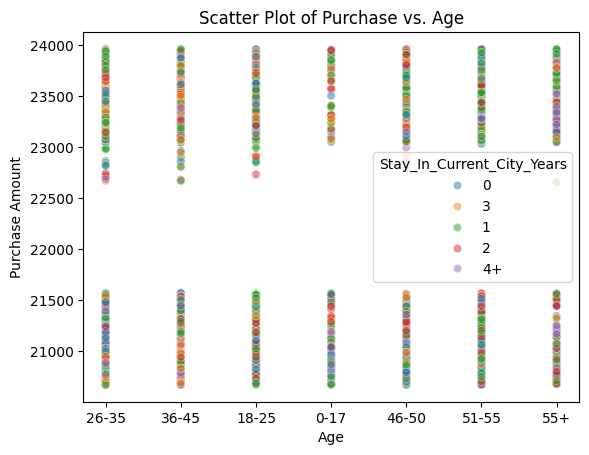

In [20]:
sns.scatterplot(x='Age', y='Purchase', data=data_interruption_upper, hue='Stay_In_Current_City_Years', alpha=0.5)
plt.title('Scatter Plot of Purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')


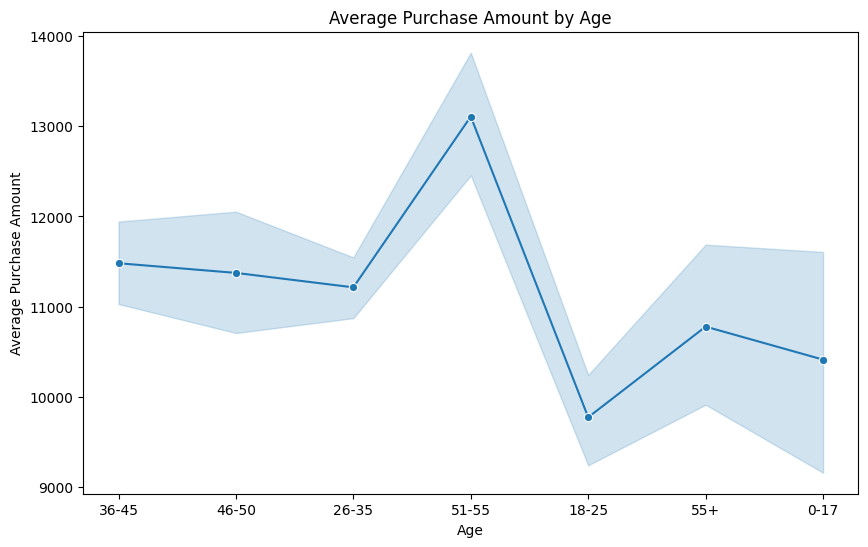

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Purchase', data=data_interruption, estimator='mean', marker='o')
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.show()


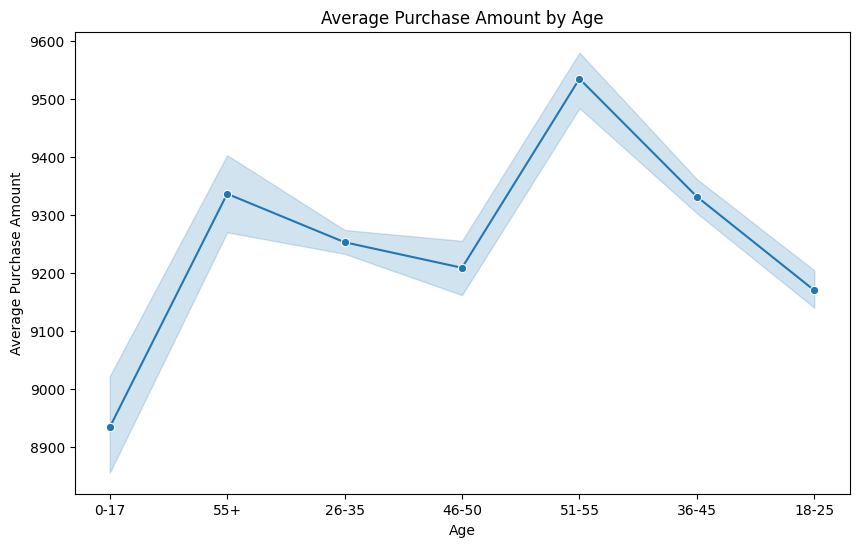

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Purchase', data=df, estimator='mean', marker='o')
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.show()


In [23]:
print("Overall Mean:", df['Purchase'].mean())
print("Outliers Mean:", data_interruption['Purchase'].mean())
print("Overall Median:", df['Purchase'].median())
print("Outliers Median:", data_interruption['Purchase'].median())


Overall Mean: 9263.968712959126
Outliers Mean: 11185.36119212541
Overall Median: 8047.0
Outliers Median: 20666.0


Athough the mean is not much different from the overall data but the median is telling a differenet story making us convince that we have to take some actions on this


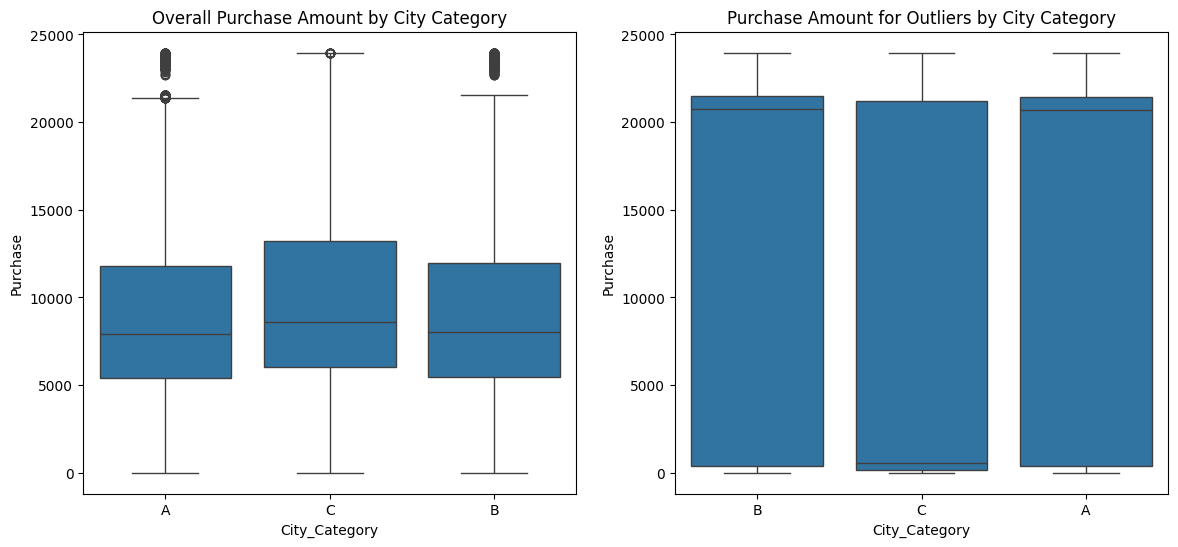

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='City_Category', y='Purchase',ax=axs[0])
axs[0].set_title('Overall Purchase Amount by City Category')

sns.boxplot(data=data_interruption ,x='City_Category', y='Purchase', ax=axs[1])
axs[1].set_title('Purchase Amount for Outliers by City Category')

plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

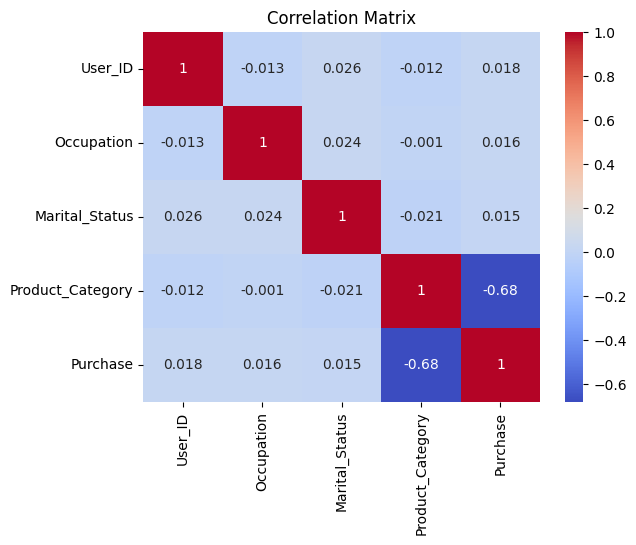

In [25]:
df_numeric_updated_1 = data_interruption.select_dtypes(include=[np.number])

sns.heatmap(df_numeric_updated_1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix') 

as we can see the purchase with city is showing somewhat strong relationship than other features so we can possibly conclude that these set of people either has moved from other city and vice versa which explains this kind of behaviour and we can easily remove this as such scenario are rare to occur and can be considered as a noise

so we are removing this outliers for filtering our dataset

In [26]:
df_cleaned = df[(df['Purchase'] >= lower_boundary) & (df['Purchase'] <= upper_boundary)]


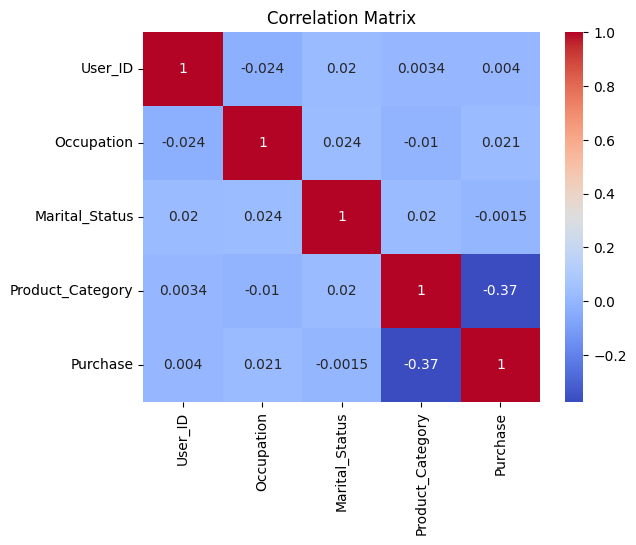

In [27]:
df_numeric_updated = df_cleaned.select_dtypes(include=[np.number])
sns.heatmap(df_numeric_updated.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539096 entries, 0 to 550061
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     539096 non-null  int64 
 1   Gender                      539096 non-null  object
 2   Age                         539096 non-null  object
 3   Occupation                  539096 non-null  int64 
 4   City_Category               539096 non-null  object
 5   Stay_In_Current_City_Years  539096 non-null  object
 6   Marital_Status              539096 non-null  int64 
 7   Product_Category            539096 non-null  int64 
 8   Purchase                    539096 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 41.1+ MB


Preprocessing


In [29]:
df_cleaned.loc[:, 'Gender'] = df_cleaned['Gender'].map({'M':1, 'F': 0})

In [30]:
df_cleaned['Gender'] = df_cleaned['Gender'].astype(int)

C:\Users\DEEPESH SAHU\AppData\Local\Temp\ipykernel_24160\858123099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].astype(int)


In [31]:
df_cleaned['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550023    0
550038    0
550039    0
550048    1
550061    0
Name: Gender, Length: 539096, dtype: int32

In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539096 entries, 0 to 550061
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     539096 non-null  int64 
 1   Gender                      539096 non-null  int32 
 2   Age                         539096 non-null  object
 3   Occupation                  539096 non-null  int64 
 4   City_Category               539096 non-null  object
 5   Stay_In_Current_City_Years  539096 non-null  object
 6   Marital_Status              539096 non-null  int64 
 7   Product_Category            539096 non-null  int64 
 8   Purchase                    539096 non-null  int64 
dtypes: int32(1), int64(5), object(3)
memory usage: 39.1+ MB


In [33]:
age_counts = df_cleaned['Age'].value_counts()
print(age_counts)


Age
26-35    215536
36-45    107648
18-25     97979
46-50     44700
51-55     37537
55+       20904
0-17      14792
Name: count, dtype: int64


In [34]:
le = LabelEncoder()


In [35]:
age_categories = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df_cleaned.loc[:, 'Age'] = pd.Categorical(df_cleaned['Age'], categories=age_categories)

# Now apply one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['Age'], drop_first=False)


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539096 entries, 0 to 550061
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     539096 non-null  int64 
 1   Gender                      539096 non-null  int32 
 2   Occupation                  539096 non-null  int64 
 3   City_Category               539096 non-null  object
 4   Stay_In_Current_City_Years  539096 non-null  object
 5   Marital_Status              539096 non-null  int64 
 6   Product_Category            539096 non-null  int64 
 7   Purchase                    539096 non-null  int64 
 8   Age_0-17                    539096 non-null  bool  
 9   Age_18-25                   539096 non-null  bool  
 10  Age_26-35                   539096 non-null  bool  
 11  Age_36-45                   539096 non-null  bool  
 12  Age_46-50                   539096 non-null  bool  
 13  Age_51-55                   539096

In [37]:

city_category = df_cleaned['City_Category']
city_category = np.unique(city_category)
df_cleaned.loc[:, 'City_Category'] = pd.Categorical(df_cleaned['City_Category'], categories=city_category)
df_cleaned = pd.get_dummies(df_cleaned, columns=['City_Category'], drop_first=False)

In [38]:
stay_in = df_cleaned['Stay_In_Current_City_Years']
stay_in = np.unique(stay_in)
df_cleaned.loc[:, 'Stay_In_Current_City_Years'] = pd.Categorical(df_cleaned['Stay_In_Current_City_Years'], categories=stay_in)
df_cleaned = pd.get_dummies(df_cleaned, columns=['Stay_In_Current_City_Years'], drop_first=False)

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539096 entries, 0 to 550061
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        539096 non-null  int64
 1   Gender                         539096 non-null  int32
 2   Occupation                     539096 non-null  int64
 3   Marital_Status                 539096 non-null  int64
 4   Product_Category               539096 non-null  int64
 5   Purchase                       539096 non-null  int64
 6   Age_0-17                       539096 non-null  bool 
 7   Age_18-25                      539096 non-null  bool 
 8   Age_26-35                      539096 non-null  bool 
 9   Age_36-45                      539096 non-null  bool 
 10  Age_46-50                      539096 non-null  bool 
 11  Age_51-55                      539096 non-null  bool 
 12  Age_55+                        539096 non-null  bool 
 13  City

In [40]:
# Saving as a CSV file
df_cleaned.to_csv('walmart_without_outliers.csv', index=False)


In [41]:
# Loading from a CSV file
df_cleaned_check = pd.read_csv('walmart_without_outliers.csv')
df_cleaned_check.head()

,User_ID,Gender,Occupation,Marital_Status,Product_Category,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,0,10,0,3,8370,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,1000001,0,10,0,1,15200,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1000001,0,10,0,12,1422,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1000001,0,10,0,12,1057,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,1000002,1,16,0,8,7969,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [42]:
df_cleaned_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539096 entries, 0 to 539095
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        539096 non-null  int64
 1   Gender                         539096 non-null  int64
 2   Occupation                     539096 non-null  int64
 3   Marital_Status                 539096 non-null  int64
 4   Product_Category               539096 non-null  int64
 5   Purchase                       539096 non-null  int64
 6   Age_0-17                       539096 non-null  bool 
 7   Age_18-25                      539096 non-null  bool 
 8   Age_26-35                      539096 non-null  bool 
 9   Age_36-45                      539096 non-null  bool 
 10  Age_46-50                      539096 non-null  bool 
 11  Age_51-55                      539096 non-null  bool 
 12  Age_55+                        539096 non-null  bool 
 13 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category            550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 37.8+ MB


In [44]:
demo = df
print(demo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category            550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 37.8+ MB
None


In [45]:
demo.loc[:, 'Gender'] = demo['Gender'].map({'M':1, 'F': 0})
demo['Gender'] = demo['Gender'].astype(int)

In [46]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Gender                      550068 non-null  int32 
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category            550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
dtypes: int32(1), int64(5), object(3)
memory usage: 35.7+ MB


In [47]:
age_categories = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
demo.loc[:, 'Age'] = pd.Categorical(demo['Age'], categories=age_categories)

demo = pd.get_dummies(demo, columns=['Age'], drop_first=False)
city_category = demo['City_Category']
city_category = np.unique(city_category)
demo.loc[:, 'City_Category'] = pd.Categorical(demo['City_Category'], categories=city_category)
demo = pd.get_dummies(demo, columns=['City_Category'], drop_first=False)


stay_in = demo['Stay_In_Current_City_Years']
stay_in = np.unique(stay_in)
demo.loc[:, 'Stay_In_Current_City_Years'] = pd.Categorical(demo['Stay_In_Current_City_Years'], categories=stay_in)
demo = pd.get_dummies(demo, columns=['Stay_In_Current_City_Years'], drop_first=False)

In [48]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        550068 non-null  int64
 1   Gender                         550068 non-null  int32
 2   Occupation                     550068 non-null  int64
 3   Marital_Status                 550068 non-null  int64
 4   Product_Category               550068 non-null  int64
 5   Purchase                       550068 non-null  int64
 6   Age_0-17                       550068 non-null  bool 
 7   Age_18-25                      550068 non-null  bool 
 8   Age_26-35                      550068 non-null  bool 
 9   Age_36-45                      550068 non-null  bool 
 10  Age_46-50                      550068 non-null  bool 
 11  Age_51-55                      550068 non-null  bool 
 12  Age_55+                        550068 non-null  bool 
 13 

In [49]:
demo.to_csv('walmart_with_outliers.csv', index=False)


In [50]:
check = pd.read_csv('walmart_with_outliers.csv')
check.head()

,User_ID,Gender,Occupation,Marital_Status,Product_Category,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,0,10,0,3,8370,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,1000001,0,10,0,1,15200,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1000001,0,10,0,12,1422,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1000001,0,10,0,12,1057,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,1000002,1,16,0,8,7969,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [51]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        550068 non-null  int64
 1   Gender                         550068 non-null  int64
 2   Occupation                     550068 non-null  int64
 3   Marital_Status                 550068 non-null  int64
 4   Product_Category               550068 non-null  int64
 5   Purchase                       550068 non-null  int64
 6   Age_0-17                       550068 non-null  bool 
 7   Age_18-25                      550068 non-null  bool 
 8   Age_26-35                      550068 non-null  bool 
 9   Age_36-45                      550068 non-null  bool 
 10  Age_46-50                      550068 non-null  bool 
 11  Age_51-55                      550068 non-null  bool 
 12  Age_55+                        550068 non-null  bool 
 13 